In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
taxi = pd.read_csv('clean_taxi.csv')

In [3]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51173 entries, 0 to 51172
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   51173 non-null  object 
 2   lpep_dropoff_datetime  51173 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           51173 non-null  int64  
 6   DOLocationID           51173 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          51173 non-null  float64
 9   fare_amount            51173 non-null  float64
 10  extra                  51173 non-null  float64
 11  mta_tax                51173 non-null  float64
 12  tip_amount             51173 non-null  float64
 13  tolls_amount           51173 non-null  float64
 14  improvement_surcharge  51173 non-null  float64
 15  to

In [4]:
taxi.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.50,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.00
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.50,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.00
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.50,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.00
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.50,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.00
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.50,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.00
5,1.0,2021-07-01 00:05:00,2021-07-01 00:11:50,N,1.0,24,239,1.0,1.90,8.0,3.25,0.5,3.00,0.0,0.3,15.05,1.0,1.0,2.75
6,2.0,2021-07-01 00:57:14,2021-07-01 01:27:43,N,1.0,75,243,1.0,0.00,17.5,0.50,0.5,0.00,0.0,0.3,18.80,2.0,1.0,0.00
7,2.0,2021-07-01 00:27:36,2021-07-01 00:32:35,N,1.0,82,82,1.0,0.66,5.0,0.50,0.5,0.00,0.0,0.3,6.30,2.0,1.0,0.00
8,2.0,2021-07-01 00:29:09,2021-07-01 00:34:18,N,1.0,74,42,1.0,1.72,7.0,0.50,0.5,2.08,0.0,0.3,10.38,1.0,1.0,0.00
9,2.0,2021-07-01 00:41:33,2021-07-01 00:49:24,N,1.0,41,42,1.0,1.37,7.5,0.50,0.5,0.00,0.0,0.3,8.80,2.0,1.0,0.00


In [5]:
taxi.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000
mean,1.851113,1.159244,98.786528,135.229613,1.307858,3.494247,15.034696,0.360429,0.480243,1.379782,0.342628,0.297966,18.454531,1.421726,1.034393,0.643137
std,0.355981,0.773260,64.719493,77.737705,0.984362,4.620208,14.545213,0.624490,0.097407,2.604697,1.514054,0.024620,16.201376,0.511146,0.182239,1.164041
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,52.000000,74.000000,1.000000,1.100000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,9.300000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,135.000000,1.000000,1.990000,10.500000,0.000000,0.500000,0.000000,0.000000,0.300000,13.560000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,213.000000,1.000000,3.860000,17.000000,0.500000,0.500000,2.160000,0.000000,0.300000,21.300000,2.000000,1.000000,0.000000
max,2.000000,5.000000,265.000000,265.000000,32.000000,109.870000,480.000000,4.500000,0.500000,87.710000,30.050000,0.300000,480.310000,5.000000,2.000000,2.750000


In [6]:
taxi = taxi.drop(['VendorID','trip_type'], axis=1)

In [7]:
len(taxi[taxi['total_amount'] <= 0])

249

In [8]:
taxi = taxi[taxi['total_amount'] > 0]

In [9]:
len(taxi[taxi['fare_amount'] <= 0])

50

In [10]:
len(taxi[taxi['trip_distance'] <= 0])

2687

Trip distance cannot be zero.

In [11]:
taxi.groupby('RatecodeID').median()['trip_distance']

RatecodeID
1.0     2.000
2.0    17.295
3.0     0.110
4.0    11.900
5.0     1.250
Name: trip_distance, dtype: float64

<AxesSubplot:xlabel='RatecodeID', ylabel='trip_distance'>

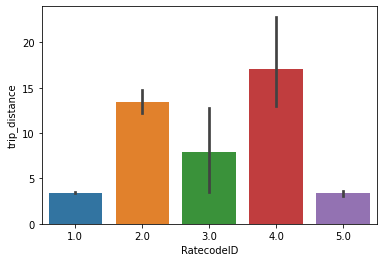

In [12]:
sns.barplot(x='RatecodeID', y='trip_distance', data=taxi[['RatecodeID','trip_distance']])

In [13]:
taxi['trip_distance'] = taxi.groupby(['RatecodeID'])['trip_distance'].apply(lambda x: x.replace(0,x.mean()))

In [14]:
len(taxi[taxi['trip_distance'] <= 0])

0

In [15]:
taxi.groupby('RatecodeID').median()['trip_distance']

RatecodeID
1.0     2.200000
2.0    17.295000
3.0     7.955000
4.0    11.900000
5.0     3.359413
Name: trip_distance, dtype: float64

In [16]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50924 entries, 0 to 51172
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lpep_pickup_datetime   50924 non-null  object 
 1   lpep_dropoff_datetime  50924 non-null  object 
 2   store_and_fwd_flag     50924 non-null  object 
 3   RatecodeID             50924 non-null  float64
 4   PULocationID           50924 non-null  int64  
 5   DOLocationID           50924 non-null  int64  
 6   passenger_count        50924 non-null  float64
 7   trip_distance          50924 non-null  float64
 8   fare_amount            50924 non-null  float64
 9   extra                  50924 non-null  float64
 10  mta_tax                50924 non-null  float64
 11  tip_amount             50924 non-null  float64
 12  tolls_amount           50924 non-null  float64
 13  improvement_surcharge  50924 non-null  float64
 14  total_amount           50924 non-null  float64
 15  pa

<AxesSubplot:xlabel='RatecodeID', ylabel='trip_distance'>

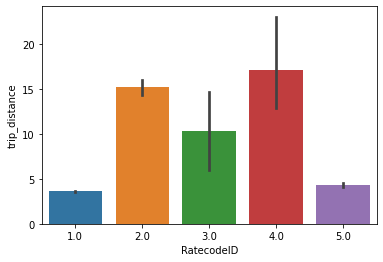

In [17]:
sns.barplot(x='RatecodeID', y='trip_distance', data=taxi[['RatecodeID','trip_distance']])

In [18]:
for i in taxi.columns[[0, 1]]:
    taxi[i] = pd.to_datetime(taxi[i])

In [19]:
taxi.head(10)

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,congestion_surcharge
0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.200000,6.0,0.50,0.5,0.00,0.0,0.3,7.30,2.0,0.00
1,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.690000,42.0,0.50,0.5,0.00,0.0,0.3,43.30,2.0,0.00
2,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.950000,6.5,0.50,0.5,2.34,0.0,0.3,10.14,1.0,0.00
3,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.240000,6.5,0.50,0.5,0.00,0.0,0.3,7.80,2.0,0.00
4,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.100000,7.0,0.50,0.5,0.00,0.0,0.3,8.30,2.0,0.00
5,2021-07-01 00:05:00,2021-07-01 00:11:50,N,1.0,24,239,1.0,1.900000,8.0,3.25,0.5,3.00,0.0,0.3,15.05,1.0,2.75
6,2021-07-01 00:57:14,2021-07-01 01:27:43,N,1.0,75,243,1.0,3.443321,17.5,0.50,0.5,0.00,0.0,0.3,18.80,2.0,0.00
7,2021-07-01 00:27:36,2021-07-01 00:32:35,N,1.0,82,82,1.0,0.660000,5.0,0.50,0.5,0.00,0.0,0.3,6.30,2.0,0.00
8,2021-07-01 00:29:09,2021-07-01 00:34:18,N,1.0,74,42,1.0,1.720000,7.0,0.50,0.5,2.08,0.0,0.3,10.38,1.0,0.00
9,2021-07-01 00:41:33,2021-07-01 00:49:24,N,1.0,41,42,1.0,1.370000,7.5,0.50,0.5,0.00,0.0,0.3,8.80,2.0,0.00


In [20]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50924 entries, 0 to 51172
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   50924 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  50924 non-null  datetime64[ns]
 2   store_and_fwd_flag     50924 non-null  object        
 3   RatecodeID             50924 non-null  float64       
 4   PULocationID           50924 non-null  int64         
 5   DOLocationID           50924 non-null  int64         
 6   passenger_count        50924 non-null  float64       
 7   trip_distance          50924 non-null  float64       
 8   fare_amount            50924 non-null  float64       
 9   extra                  50924 non-null  float64       
 10  mta_tax                50924 non-null  float64       
 11  tip_amount             50924 non-null  float64       
 12  tolls_amount           50924 non-null  float64       
 13  i

In [21]:
le = LabelEncoder()

In [22]:
taxi['store_and_fwd_flag'] = le.fit_transform(taxi['store_and_fwd_flag'])
taxi.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,congestion_surcharge
0,2021-07-01 00:30:52,2021-07-01 00:35:36,0,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,0.0
1,2021-07-01 00:25:36,2021-07-01 01:01:31,0,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,0.0
2,2021-07-01 00:05:58,2021-07-01 00:12:00,0,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,0.0
3,2021-07-01 00:41:40,2021-07-01 00:47:23,0,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,0.0
4,2021-07-01 00:51:32,2021-07-01 00:58:46,0,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,0.0


In [23]:
taxi['fare_amount'].describe()

count    50924.000000
mean        15.108210
std         14.542593
min          0.000000
25%          7.000000
50%         10.500000
75%         17.000000
max        480.000000
Name: fare_amount, dtype: float64

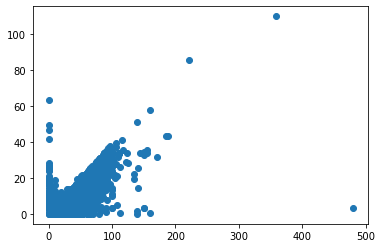

In [24]:
x = taxi['fare_amount']
y = taxi['trip_distance']

plt.scatter(x, y)
plt.xlim=([0,200])
plt.ylim=([0,75])
plt.show()

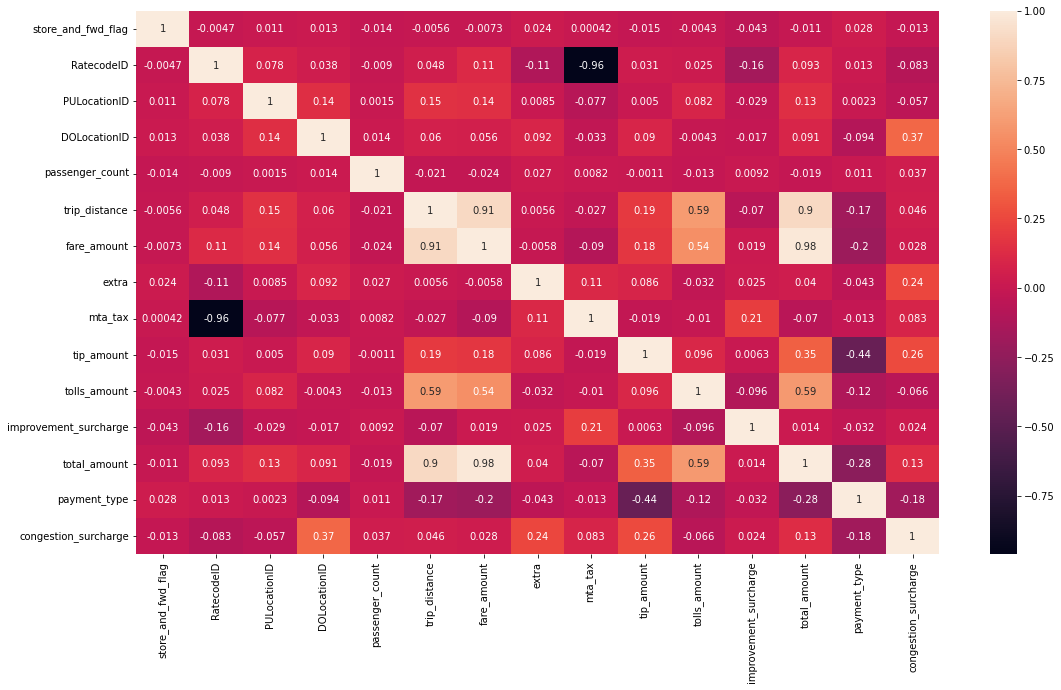

In [25]:
plt.figure(figsize=(18, 10))
sns.heatmap(taxi.corr(), annot=True);

In [26]:
taxi['day_of_the_week'] = taxi['lpep_pickup_datetime'].dt.day_name()

<AxesSubplot:xlabel='count', ylabel='day_of_the_week'>

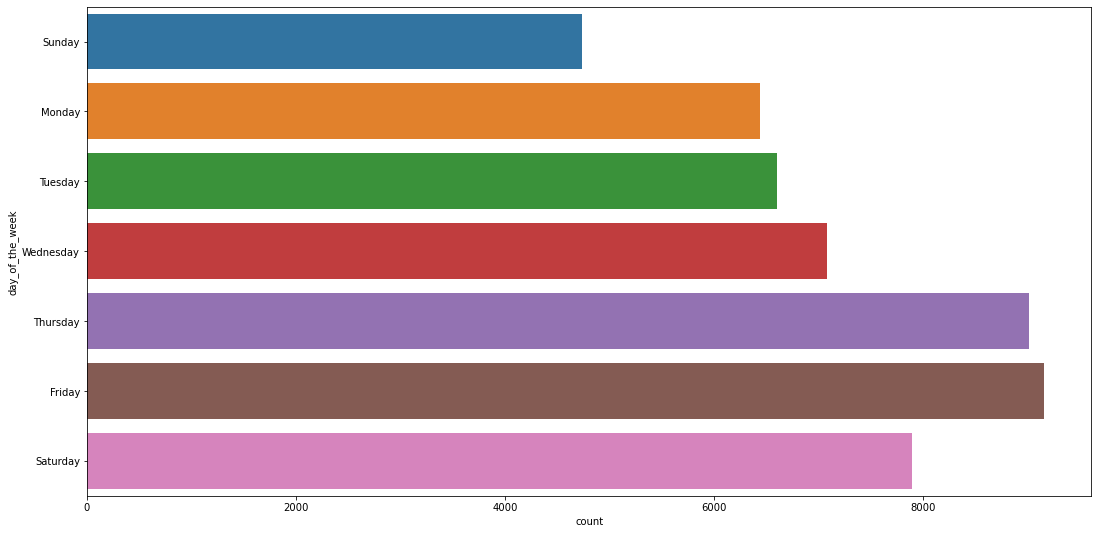

In [27]:
plt.figure(figsize=(18,9))
sns.countplot(y='day_of_the_week', data=taxi, order=('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))

Text(0.5, 0, 'Hour of the Day')

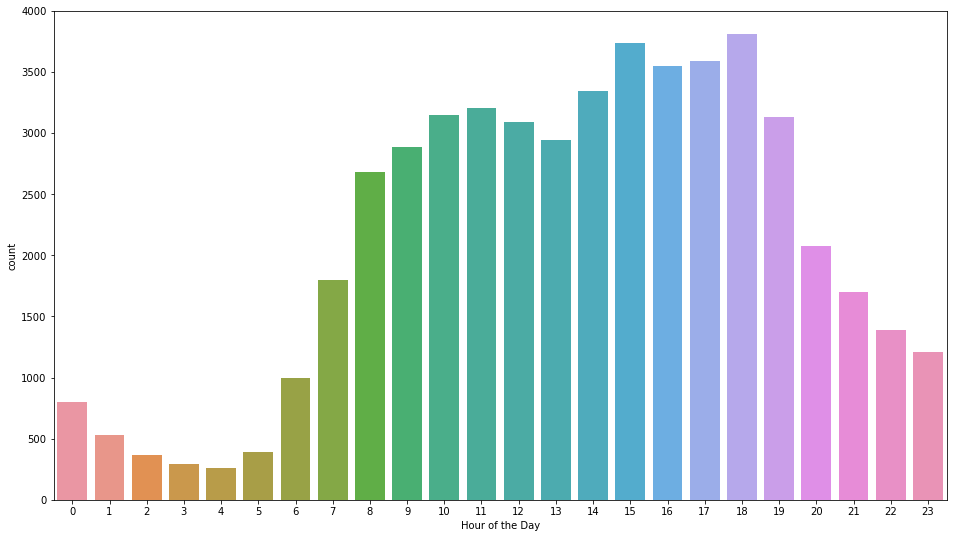

In [28]:
plt.figure(figsize=(16,9))
sns.countplot(x=taxi['lpep_pickup_datetime'].dt.hour, data=taxi)
plt.xlabel('Hour of the Day')

In [29]:
for i in taxi.columns[[0, 1]]:
    taxi[i] = pd.to_numeric(taxi[i])

In [30]:
X = taxi.drop('total_amount', axis=1)
y = taxi.total_amount

In [31]:
X = pd.get_dummies(data=X)
y = pd.get_dummies(data=y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=123)

In [33]:
X_train.dtypes

lpep_pickup_datetime           int64
lpep_dropoff_datetime          int64
store_and_fwd_flag             int64
RatecodeID                   float64
PULocationID                   int64
DOLocationID                   int64
passenger_count              float64
trip_distance                float64
fare_amount                  float64
extra                        float64
mta_tax                      float64
tip_amount                   float64
tolls_amount                 float64
improvement_surcharge        float64
payment_type                 float64
congestion_surcharge         float64
day_of_the_week_Friday         uint8
day_of_the_week_Monday         uint8
day_of_the_week_Saturday       uint8
day_of_the_week_Sunday         uint8
day_of_the_week_Thursday       uint8
day_of_the_week_Tuesday        uint8
day_of_the_week_Wednesday      uint8
dtype: object

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [35]:
scaler.fit_transform(X_train)

array([[-0.2336891 , -0.23375881, -0.06151905, ..., -0.46337113,
         2.5999328 , -0.40298971],
       [ 0.12522079,  0.1249714 , -0.06151905, ..., -0.46337113,
        -0.38462533,  2.48145294],
       [ 0.3373341 ,  0.33702139, -0.06151905, ..., -0.46337113,
        -0.38462533, -0.40298971],
       ...,
       [-0.10100465, -0.1011417 , -0.06151905, ..., -0.46337113,
        -0.38462533, -0.40298971],
       [ 0.03722901,  0.03717713, -0.06151905, ..., -0.46337113,
        -0.38462533, -0.40298971],
       [-0.13466875, -0.134661  , -0.06151905, ..., -0.46337113,
        -0.38462533, -0.40298971]])

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [37]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rfr = RandomForestRegressor()
knn = KNeighborsRegressor()

In [38]:
lr.fit(X_train, y_train)
lin_pred = lr.predict(X_test)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(lin_pred, y_test)))
print('R-Squared:', metrics.r2_score(y_test, lin_pred))

Root Mean Squared Error: 0.020751078813825437
R-Squared: 0.0006163910841680896


In [39]:
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(dt_pred, y_test)))
print('R-Squared:', metrics.r2_score(y_test, dt_pred))

Root Mean Squared Error: 0.010799268919693718
R-Squared: 0.4646272598273476


In [40]:
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(knn_pred, y_test)))
print('R-Squared:', metrics.r2_score(y_test, knn_pred))

Root Mean Squared Error: 0.02267564115809388
R-Squared: 0.004892407069962287


The most accurate model is the Decision Tree Regressor with the RMSE value of 0.01 and a R2 value of 0.46